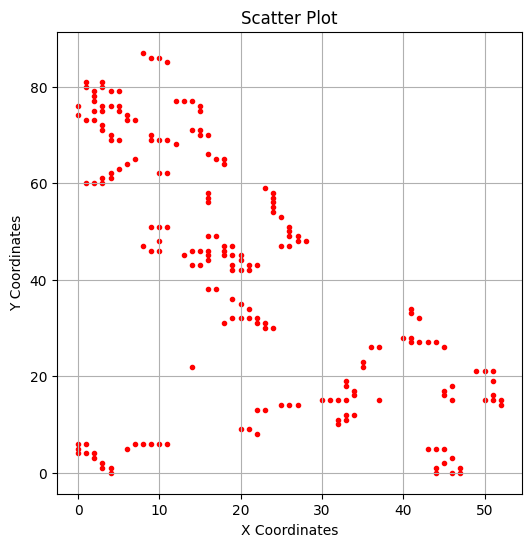

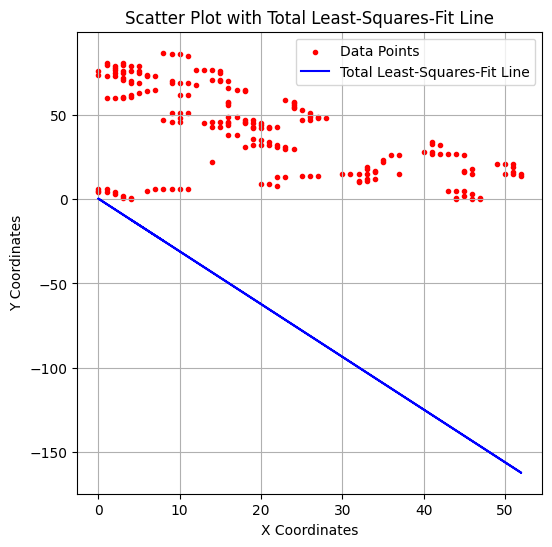

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None
edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='.', color='red')  
plt.title('Scatter Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()

# Find the total least-squares-fit line using Singular Value Decomposition (SVD)
def total_least_squares(x, y):
    A = np.vstack([x, y, np.ones(len(x))]).T
    _, _, V = np.linalg.svd(A)
    slope, intercept = -V[0, 1] / V[0, 0], -V[1, 1] / V[1, 0]
    return slope, intercept

total_slope, total_intercept = total_least_squares(x, y)

# The scatter plot of the original data points (x, y)
plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='.', color='red', label='Data Points')

# The total least-squares-fit line
plt.plot(x, total_slope * x + total_intercept, color='blue', label='Total Least-Squares-Fit Line')

plt.title('Scatter Plot with Total Least-Squares-Fit Line')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()  
plt.grid(True)
plt.show()
